In [91]:
'''
Random Forest:
It is a supervised learning algorithm , used for both classification and regression type of problems
It creates multiple decision trees, gets prediction from each tree and selects the best solution by means of voting
accurate and robust model
takes the average of all the predictions made by the decision-trees. So, it does not suffer from the overfitting problem.
More complex and difficult to interpret
Decision-trees are computationally faster as compared to random forests
'''

'\nRandom Forest:\nIt is a supervised learning algorithm , used for both classification and regression type of problems\nIt creates multiple decision trees, gets prediction from each tree and selects the best solution by means of voting\naccurate and robust model\ntakes the average of all the predictions made by the decision-trees. So, it does not suffer from the overfitting problem.\nMore complex and difficult to interpret\nDecision-trees are computationally faster as compared to\xa0random\xa0forests\n'

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [93]:
df=pd.read_csv('/kaggle/input/car-evaluation-data-set/car_evaluation.csv',header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [94]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [95]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [97]:
for col in col_names:
    print(f'Columns Name: {col}')
    print(df[col].value_counts())  
    print('================================')

Columns Name: buying
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Columns Name: maint
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Columns Name: doors
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
Columns Name: persons
persons
2       576
4       576
more    576
Name: count, dtype: int64
Columns Name: lug_boot
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
Columns Name: safety
safety
low     576
med     576
high    576
Name: count, dtype: int64
Columns Name: class
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [98]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [99]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [100]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [101]:
le=LabelEncoder()
df['buying']=le.fit_transform(df['buying'])
df['maint']=le.fit_transform(df['maint'])
df['doors']=le.fit_transform(df['doors'])
df['persons']=le.fit_transform(df['persons'])
df['lug_boot']=le.fit_transform(df['lug_boot'])
df['safety']=le.fit_transform(df['safety'])

In [102]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc


In [103]:
X = df.drop(['class'], axis=1)
y = df['class']

In [104]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [105]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [106]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [107]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9595


In [108]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9595


In [109]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [110]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.266562
persons     0.221722
buying      0.198684
maint       0.154238
lug_boot    0.090017
doors       0.068776
dtype: float64

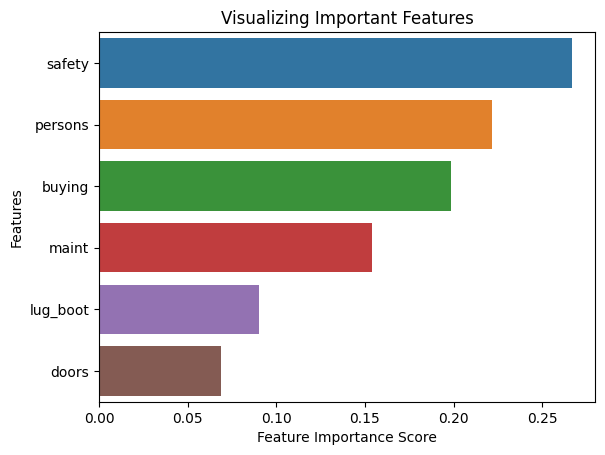

In [111]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [112]:
X.drop(['doors'],axis=1,inplace=True)

In [113]:
X

,buying,maint,persons,lug_boot,safety
0,3,3,0,2,1
1,3,3,0,2,2
2,3,3,0,2,0
3,3,3,0,1,1
4,3,3,0,1,2
...,...,...,...,...,...
1723,1,1,2,1,2
1724,1,1,2,1,0
1725,1,1,2,0,1
1726,1,1,2,0,2


In [114]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [115]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)
# Check accuracy score 
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9299


In [116]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[106  12   8   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.82      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.98      0.97      0.98       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.94      0.93      0.93       571

